In [3]:
import numpy as np
import matplotlib.pyplot as plt
from laser.zernike import zernike_list_to_map, cart2pol, zernike_project, zernike_name
%matplotlib inline

# Generate wavefront from list of polynomials

The sequential index j used here is the following

| Sequential order j | Radial order n | Azimuthal order m | Name |
|---|---|---|---|
|1|0|0|Piston|
|2|1|1|Tilt 0°|
|3|1|-1|Tilt 90°|
|4|2|0|Defocus|
|5|2|2|Astigmatism 0°|
|6|2|-2|Astigmatism 45°|
|7|3|1|Coma 0°|
|8|3|-1|Coma 90°|
|9|3|3|Trefoil 0°|
|10|3|-3|Trefoil 30°|
|11|4|0|Spherical aberration|
|12|4|2|2nd astigmatism 0°|
|13|4|-2|2nd astigmatism 45°|
|14|4|4|Tetrafoil 0°|
|15|4|-4|Tetrafoil 22.5°|

And so on...

RMS amplitude = 1.130 lambda
sqrt( sum( coeff**2 ) ) = 1.136 lambda
PtV amplitude = 6.469 lambda


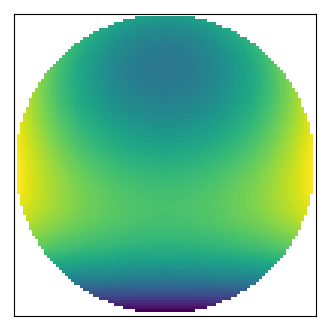

In [4]:
# Number of points
N = 100
# Number of zernike polynomials
Nz = 15

# Space axis
x = np.linspace(-1,1,N)
X,Y = np.meshgrid(x,x)
rho, theta = cart2pol(X, Y)

# build list of coefficients
list_zern = np.zeros(Nz)
list_zern[4] = 1 # astigmatism 0°
list_zern[9] = 0.2 # trefoil 30°
list_zern[7] = -0.5 # coma 90°

# Build the wavefront
wmap = zernike_list_to_map(list_zern, rho, theta)

# Mask the area that is not in the unit disk
wmap_disp = np.ma.MaskedArray(wmap, rho>1)

# Display the resulting wavefront
plt.figure(dpi=100)
plt.imshow(wmap_disp, extent=[-1,1,-1,1])
plt.xticks([])
plt.yticks([])

# Display amplitude as well
# The masked array should also be used for the RMS calculation
print('RMS amplitude = {0:.3f} lambda'.format(np.std(wmap_disp)))
print('sqrt( sum( coeff**2 ) ) = {0:.3f} lambda'.format(np.sqrt(np.sum(list_zern**2))))
print('PtV amplitude = {0:.3f} lambda'.format(np.ptp(wmap_disp)))


The square root of the sum of the Zernike coefficient squared is equal to the wavefront rms amplitude, if the Zernike polynomials are normalised. The eventual mismatch comes from a too small spatial resolution.

# Project wavefront map to retreive zernike coefficients

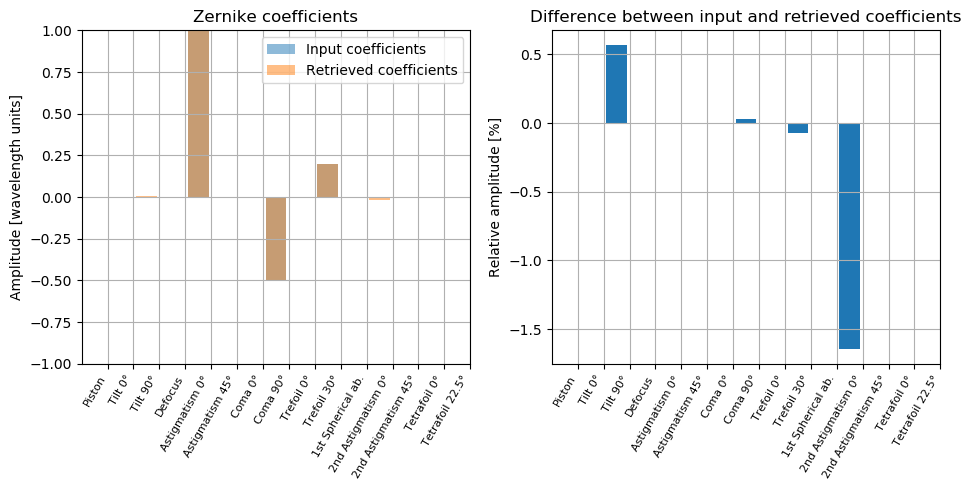

In [27]:
list_proj = zernike_project(wmap, N_max = Nz)

fig, [ax1, ax2] = plt.subplots(1,2, dpi=100, figsize=(10,5), sharex=True)
ax1.bar(np.arange(list_zern.size)+0.5, list_zern, alpha=0.5, label="Input coefficients")
# the +0.5 centers the bars on the grid
ax1.bar(np.arange(list_proj.size)+0.5, list_proj, alpha=0.5, label="Retrieved coefficients")
ax1.legend()
ax1.set_ylabel('Amplitude [wavelength units]')
ax1.set_title('Zernike coefficients')
ax1.set_ylim(-np.max(np.abs(list_zern)),np.max(np.abs(list_zern)))
ax1.set_xticks(np.arange(1, 16))
ax1.set_xticklabels(zernike_name, rotation=60, ha='right', size=8)
ax1.set_xlim(0,Nz)
ax1.grid(True)

ax2.bar(np.arange(list_zern.size)+0.5, (list_proj-list_zern)/np.max(np.abs(list_zern))*100)
ax2.set_ylabel('Relative amplitude [%]')
ax2.set_title('Difference between input and retrieved coefficients')
ax2.set_xticklabels(zernike_name, rotation=60, ha='right', size=8)
ax2.grid(True)
fig.tight_layout()

Very good match between the specified coefficients and the retreived ones. The mismatch comes again from the spatial resolution.